In [1]:
src_train_path = '../data/normal/train'
src_val_path = '../data/normal/val'
src_test_path = '../data/normal/test'

dest_train_path = '../data/stretched/train'
dest_val_path = '../data/stretched/val'
dest_test_path = '../data/stretched/test'

paths = {'src': [src_train_path, src_val_path, src_test_path],
         'dst': [dest_train_path, dest_val_path, dest_test_path]}

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread(f'{src_test_path}/0/32411.png', 0)

def stretch_histogram(img):
    lower_thresh = img.min()
    upper_thresh = img.max()
    r = 255.0/(upper_thresh-lower_thresh+2) # unit of stretching
    out = np.round(r*np.where(img>=lower_thresh,img-lower_thresh+1,0)).clip(max=255)
    return out.astype(img.dtype)

def plot_img_with_histogram(img, figsize=(10,5)):
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    ax1.plot(cdf_normalized, color = 'b')
    ax1.hist(img.flatten(),256,[0,256], color = 'r')
    ax2.imshow(img, cmap='gray')
    ax1.set_xlim([0,256])
    
def normalize_histogram_CLAHE(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)

In [9]:
import os

for i in range(3):
    for dir in os.listdir(paths['src'][i]):
        src = f'{paths["src"][i]}/{dir}'
        dst = f'{paths["dst"][i]}/{dir}'
        for img_name in os.listdir(src):
            img_src_path = f'{src}/{img_name}'
            img_dst_path = f'{dst}/{img_name}'
            img = cv2.imread(img_src_path, cv2.IMREAD_GRAYSCALE)
            img_normalized = stretch_histogram(img)
            cv2.imwrite(img_dst_path, img_normalized)

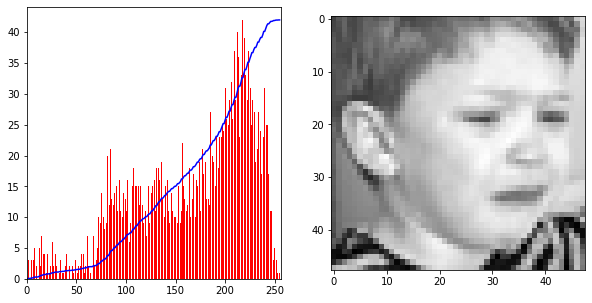

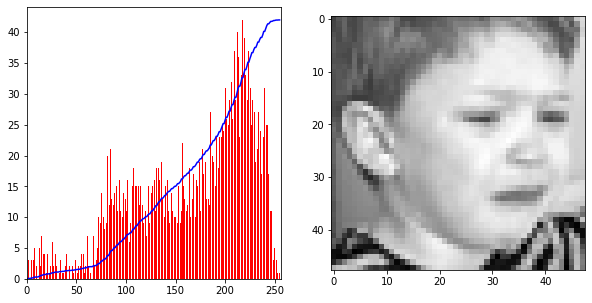

In [11]:
img = cv2.imread(f'{dest_train_path}/0/241.png', 0)
plot_img_with_histogram(img)
img2 = stretch_histogram(img)
plot_img_with_histogram(img2)

In [ ]:
# plot_img_with_histogram(img)
# plot_img_with_histogram(normalize_histogram_CLAHE(img))